# Calculating median with quickselect

In [1]:
from random import randint, random, choice
import numpy as np
import sys
sys.setrecursionlimit(1500)

In [2]:
n = 501
series = [randint(1,25) for i in range(n)]
print ('Median is %0.1f' % np.median(series))

Median is 14.0


In [3]:
print ('251st element of the ordered series is %0.1f' % 
       sorted(series)[250])

251st element of the ordered series is 14.0


In [4]:
def quickselect(series, k):
    pivot = choice(series)

    left, right = list(),list()
    for item in series:
        if item < pivot: 
            left.append(item)
        if item > pivot:
            right.append(item)
            
    length_left = len(left)
    if length_left > k:
        return quickselect(left, k)
    k -= length_left

    duplicates = len(series) - (length_left + len(right))
    if duplicates > k:
        return float(pivot)
    k -= duplicates
    
    return quickselect(right, k)

In [5]:
quickselect(series, 250)

14.0

In [6]:
def median(series):
    if len(series) % 2 != 0:
        return quickselect(series, len(series)//2)
    else:
        left  = quickselect(series, (len(series)-1) // 2)
        right = quickselect(series, (len(series)+1) // 2)
        return (left + right) / 2

In [7]:
median(series)

14.0

### MonteCarlo simulation

In [8]:
def quickselect(series, k, counter=0):
    pivot = choice(series)

    left, right = list(),list()
    for item in series:
        if item < pivot: 
            left.append(item)
        if item > pivot:
            right.append(item)
    
    counter += len(series)
            
    length_left = len(left)
    if length_left > k:
        return quickselect(left, k, counter)
    k -= length_left

    duplicates = series.count(pivot)
    if duplicates > k:
        return float(pivot), counter
    k -= duplicates
    
    return quickselect(right, k, counter)

In [9]:
results = list()
for run in range(1000):
    n = 1001
    series = [randint(1,25) for i in range(n)]
    median,count = quickselect(series, n//2)
    assert(median==np.median(series))
    results.append(count)

print ("Mean operations: %i" % np.mean(results))

Mean operations: 2764


In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

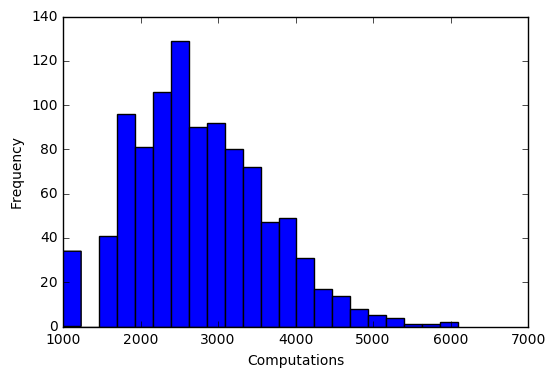

In [12]:
plt.hist(results, bins='auto')
plt.xlabel("Computations")
plt.ylabel("Frequency")
plt.show()

In [13]:
input_size = [501, 1001, 5001, 10001, 20001, 50001]
computations = list()
for n in input_size:
    results = list()
    for run in range(1000):
        series = [randint(1, 25) for i in range(n)]
        median,count = quickselect(series, n//2)
        assert(median==np.median(series))
        results.append(count)
    computations.append(np.mean(results))

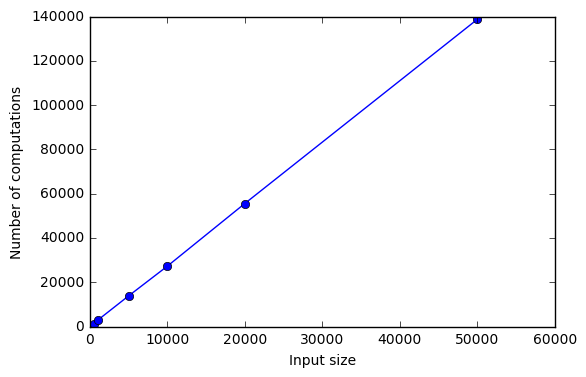

In [14]:
plt.plot(input_size, computations, '-o')
plt.xlabel("Input size")
plt.ylabel("Number of computations")
plt.show()

### Quicksort

In [15]:
def choose_leftmost(l): return l[0]

In [16]:
def quicksort(series, get):
    
    try:
        global operations
        operations += len(series)
    except:pass
        
    if len(series) <= 3:
        return sorted(series)
    
    pivot = get(series)
    duplicates = series.count(pivot)
    
    left, right = list(),list()
    for item in series:
        if item < pivot: 
            left.append(item)
        if item > pivot:
            right.append(item)
            
    return quicksort(left, get) + [pivot
            ] * duplicates + quicksort(right, get)

In [17]:
series = list(range(25))
operations = 0
sorted_list = quicksort(series, choose_leftmost)
print ("Operations: %i" % operations)

Operations: 322


In [18]:
def choose_random(l): return choice(l) 

In [19]:
series = [randint(1,25) for i in range(25)]
operations = 0
sorted_list = quicksort(series, choose_random)
print ("Operations: %i" % operations)

Operations: 81


In [20]:
np.log(25) * 25

80.471895621705016